In [7]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from selenium import webdriver
import seaborn as sns
import time
import os

In [8]:
def scrape_data():
    filename=str(input('Name file '))
    driver = webdriver.Chrome(r"C:\Users\keith\OneDrive\Projects\chromedriver_win32\chromedriver.exe")
    
    #place %20 in between search words
    search0=str(input('Search words '))
    
    site="https://www.fiverr.com/search/gigs?query="+search0+"&source=top-bar&ref_ctx_id=718501f5fbeb68f4c6bd2db43c890311&search_in=everywhere&search-autocomplete-original-term="+search0

    
    driver.get(site)

    content=driver.page_source
    soup = BeautifulSoup(content)
    ###TITLE
    title=soup.find_all(class_='Bh6SL1u text-normal')
    title_list=[]
    for i in title:
        title_list.append(i.get_text())

    ###LEVEL
    level=soup.find_all('div',
                        class_='flex-between flex-items-center m-t-12 m-b-12')
    level_list=[]

    for j in level:
        level_list.append(j.get_text())

    record = 'Level 1|Level 2'
    stage=[]

    for m in level_list:
        seller = re.findall(record, m, flags=re.IGNORECASE)
        seller=''.join(seller)
        if len(seller)==0:
            stage.append('Beginner')
        else:
            stage.append(seller)

    ###FREELANCER NAME
    freelance=soup.find_all(class_='mgCk4Qq')
    freelance_list=[]
    for k in freelance:
        freelance_list.append(k.get_text())

    ###RATINGS
    rating_count=soup.find_all(class_='m-t-8 flex BVtNcON')
    rating_count_list=[]
    for l in rating_count:
        rating_count_list.append(l.get_text())

    ###AMOUNT PAID
    amount=soup.find_all(class_='text-bold co-grey-1200')
    amount_list=[]
    for m in amount:
        amount_list.append(m.get_text().replace(u'\xa0', u' ').replace('From','').strip().replace('£',''))


    ###DATAFRAME
    values = {'Level': stage, 'Title': title_list,
              'Amount': amount_list, 'Rating/reviewers': rating_count_list}

    data = pd.DataFrame(values)

    data[['Rating', 'Reviewers']] = data['Rating/reviewers'].str.split('(', expand=True)

    data['Rating'] = data['Rating'].apply(lambda x: 0 if 'Not rated yet' in x else x)

    data['Reviewers'] = data['Reviewers'].apply(lambda x: x.replace(')', '') if x is not None else 0)
    data['Amount'] = data['Amount'].apply(lambda x: x.replace(',', ''))
    data = data.drop('Rating/reviewers', axis=1)

    col=['Reviewers','Rating','Amount']
    for x in col:
        data[x]=data[x].astype(float)
        
    #Chosen path to store csv
    filepath='C:\\Users\\keith\\PycharmProjects\\pythonProject2\\Fiverr\\'+str(filename)

    data.to_csv(filepath)
    driver.close()
    time.sleep(3)
    return 'CSV file has been stored in your Pycharm Fiverr file'

In [9]:
scrape_data()

Name file data10
Search words data%20pipeline


'CSV file has been stored in your Pycharm Fiverr file'

In [10]:
#APPEND ALL FIVER CSV FILES

path=r'C:\Users\keith\PycharmProjects\pythonProject2\Fiverr'


files=[]

for x in os.listdir(path):
    files.append(x)

data_append=[]

for y in files[1:]:
    data_append.append(pd.read_csv(os.path.join(path,y)))

data_append=pd.concat(data_append)




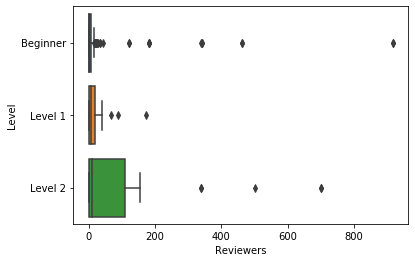

In [11]:
sns.boxplot(x='Reviewers',y='Level',data=data_append)

beg=data_append[data_append['Level']=='Beginner'].sort_values(by='Reviewers',ascending=False)